### Using convergence technique (not effective)

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
import matplotlib.pyplot as plt

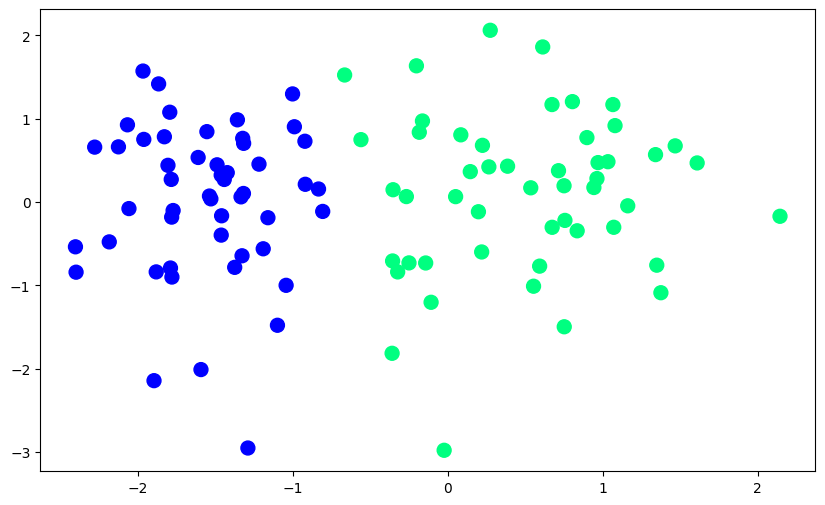

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100);

In [4]:
def step(z):
    return 1 if z>0 else 0

In [5]:
def perceptron(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])               # weights = [1, 1, 1]; eg. np.ones(5) = [1, 1, 1, 1, 1]
    lr = 0.1    # learning rate

    for i in range(1000):
        j = np.random.randint(0, 100)           # storing a random index
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

    return weights[0], weights[1:]

In [6]:
intercept_, coeff_ = perceptron(X, y)

In [7]:
print(coeff_)
print(intercept_)

[1.42921532 0.02461238]
1.0


In [8]:
m = -(coeff_[0] / coeff_[1])            # m = -A/B
b = -(intercept_ / coeff_[1])           # c = -C/B

In [9]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

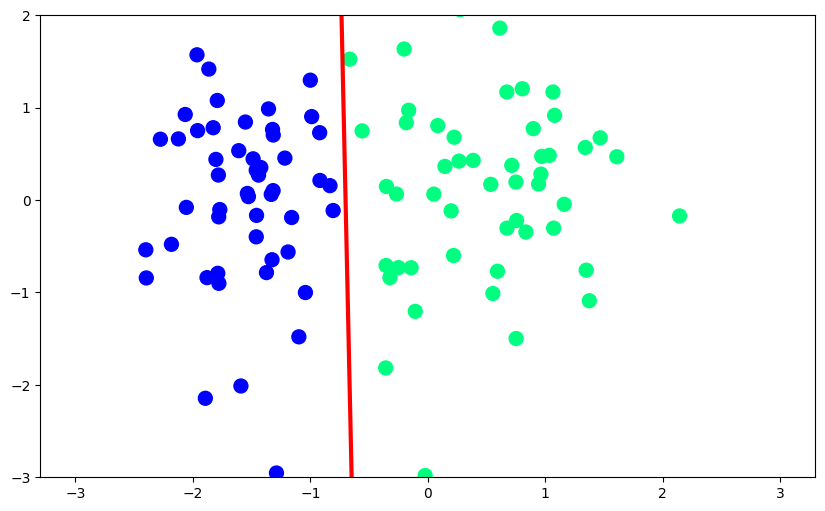

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

### Using Loss Function (effective and accurate)

In [11]:
def perceptron_with_loss_function(X, y):
    w1 = w2 = b = 1
    lr = 0.1

    for j in range(1000):
        for i in range(X.shape[0]):

            z = (w1 * X[i][0]) + (w2 * X[i][1]) + b

            if z * y[i] < 0:
                w1 = w1 + lr * (y[i] * X[i][0])
                w2 = w2 + lr * (y[i] * X[i][1])
                b  = b  + lr * y[i] 
    
    return w1, w2, b

In [12]:
w1, w2, b = perceptron_with_loss_function(X, y)